# 信噪比计算

In [5]:
import numpy as np
import math

def DGP_1(n: int, p: int) -> list[np.ndarray, np.ndarray]:
    X = np.random.rand(n, p)
    X1 = X[:, 0].reshape(-1, 1)
    error = np.random.randn(n, 1)
    y = 10 * np.sin(math.pi * X1) + error
    return [X, y]

def DGP_2(n: int, p: int) -> list[np.ndarray, np.ndarray]:
    X = np.random.rand(n, p)
    X1 = X[:, 0].reshape(-1, 1)
    X2 = X[:, 1].reshape(-1, 1)
    X3 = X[:, 2].reshape(-1, 1)
    X4 = X[:, 3].reshape(-1, 1)
    X5 = X[:, 4].reshape(-1, 1)
    epsilon = np.random.randn(n, 1)
    y = 10 * np.sin(math.pi * X1 * X2) + 20 * (X3 - 0.05) ** 2 + 10 * X4 + 5 * X5 + epsilon
    return [X, y]

def DGP_3(n: int, p: int) -> list[np.ndarray, np.ndarray]:
    X = np.random.rand(n, p)
    X1 = X[:, 0].reshape(-1, 1)
    X2 = X[:, 1].reshape(-1, 1)
    X3 = X[:, 2].reshape(-1, 1)
    X4 = X[:, 3].reshape(-1, 1)
    X5 = X[:, 4].reshape(-1, 1)
    epsilon = np.random.randn(n, 1)

    y = np.zeros((n, 1))
    for i in range(n):
        ri = decision_tree(X1[i], X2[i], X3[i], X4[i], X5[i])  
        y[i] = ri + epsilon[i]

    return [X, y]

def decision_tree(X1, X2, X3, X4, X5):
    if X4 < 0.383:
        if X2 < 0.2342:
            return 8.177
        else:
            if X1 < 0.2463:
                return 8.837
            else:
                return 13.15
    else:
        if X1 < 0.47:
            if X5 < 0.2452:
                return 10.99
            else:
                if X3 >= 0.2234:
                    return 18.03
                else:
                    return 13.87
        else:
            if X2 < 0.2701:
                return 15.02
            else:
                if X5 < 0.5985:
                    return 18.61
                else:
                    return 21.74

def calculate_snr(y_true: np.ndarray, y_pred: np.ndarray) -> float:
    """
    计算信噪比（SNR）
    :param y_true: 真实信号（不含噪声）
    :param y_pred: 观测值（包含噪声）
    :return: 信噪比
    """
    error = y_pred - y_true
    signal_variance = np.var(y_true)
    noise_variance = np.var(error)
    snr = signal_variance / noise_variance
    return snr

# 计算DGP1、DGP2和DGP3的信噪比
n, p = 500, 100  # 假设样本数为1000，特征数为5

# DGP 1
X1, y1 = DGP_1(n, p)
# 信号：10 * np.sin(math.pi * X1)
y_true1 = 10 * np.sin(math.pi * X1)
snr_1 = calculate_snr(y_true1, y1)
print(f"SNR for DGP 1: {snr_1}")

# DGP 2
X2, y2 = DGP_2(n, p)
# 信号部分：10 * np.sin(math.pi * X1 * X2) + 20*(X3 - 0.05)**2 + 10*X4 + 5*X5
X1_2, X2_2, X3_2, X4_2, X5_2 = X2[:, 0].reshape(-1, 1), X2[:, 1].reshape(-1, 1), X2[:, 2].reshape(-1, 1), X2[:, 3].reshape(-1, 1), X2[:, 4].reshape(-1, 1)
y_true2 = 10 * np.sin(math.pi * X1_2 * X2_2) + 20 * (X3_2 - 0.05) ** 2 + 10 * X4_2 + 5 * X5_2
snr_2 = calculate_snr(y_true2, y2)
print(f"SNR for DGP 2: {snr_2}")

# DGP 3
X3, y3 = DGP_3(n, p)
# 信号部分：通过decision_tree函数计算得到真实信号
# 假设你已定义decision_tree函数
y_true3 = np.array([decision_tree(X3[i, 0], X3[i, 1], X3[i, 2], X3[i, 3], X3[i, 4]) for i in range(n)]).reshape(-1, 1)
snr_3 = calculate_snr(y_true3, y3)
print(f"SNR for DGP 3: {snr_3}")

SNR for DGP 1: 0.4740268268977184
SNR for DGP 2: 49.750813125125546
SNR for DGP 3: 17.315553713240874


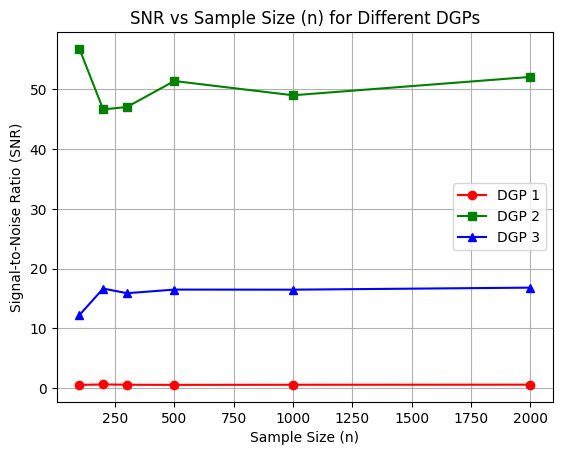

In [12]:
import numpy as np
import math
import matplotlib.pyplot as plt

# 绘制信噪比随样本量n的变化
n_values = [100, 200, 300, 500, 1000, 2000]
snr_1_values = []
snr_2_values = []
snr_3_values = []

for n in n_values:
    X1, y1 = DGP_1(n, 5)
    y_true1 = 10 * np.sin(math.pi * X1)
    snr_1_values.append(calculate_snr(y_true1, y1))

    X2, y2 = DGP_2(n, 5)
    X1_2, X2_2, X3_2, X4_2, X5_2 = X2[:, 0].reshape(-1, 1), X2[:, 1].reshape(-1, 1), X2[:, 2].reshape(-1, 1), X2[:, 3].reshape(-1, 1), X2[:, 4].reshape(-1, 1)
    y_true2 = 10 * np.sin(math.pi * X1_2 * X2_2) + 20 * (X3_2 - 0.05) ** 2 + 10 * X4_2 + 5 * X5_2
    snr_2_values.append(calculate_snr(y_true2, y2))

    X3, y3 = DGP_3(n, 5)
    y_true3 = np.array([decision_tree(X3[i, 0], X3[i, 1], X3[i, 2], X3[i, 3], X3[i, 4]) for i in range(n)]).reshape(-1, 1)
    snr_3_values.append(calculate_snr(y_true3, y3))

# 绘制结果
plt.plot(n_values, snr_1_values, label='DGP 1', marker='o', color = 'r')
plt.plot(n_values, snr_2_values, label='DGP 2', marker='s', color = 'g')
plt.plot(n_values, snr_3_values, label='DGP 3', marker='^', color = 'b')

plt.xlabel('Sample Size (n)')
plt.ylabel('Signal-to-Noise Ratio (SNR)')
plt.title('SNR vs Sample Size (n) for Different DGPs')
plt.legend()
plt.grid(True)
plt.show()